In [1]:
import nltk
nltk.download('wordnet')

#from google.colab import files
#uploaded = files.upload()

[nltk_data] Downloading package wordnet to /home/maad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import pandas as pd
import gensim
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, roc_auc_score,roc_curve, auc, f1_score
import seaborn as sns
import sklearn

In [4]:
df = pd.read_excel("NewCleanFetchedData.xlsx", sheet_name=None, ignore_index=True, sort=True)
data = pd.concat(df.values(), ignore_index=True, sort=False)
data.isna().sum()
data['Tag'].value_counts()

EN    2174
WB    2142
HT    2057
GM    1960
PT    1935
BN    1923
ED    1913
SI    1815
SP    1638
ST    1485
RE    1296
Name: Tag, dtype: int64

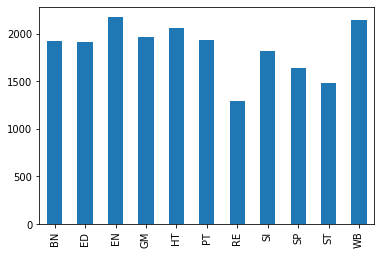

In [5]:
data['Tag'].value_counts().sort_index().plot.bar()

In [6]:
data['Tag'].describe()

count     20338
unique       11
top          EN
freq       2174
Name: Tag, dtype: object

In [7]:
data.head()

Unnamed: 0  Unnamed: 0.1  \
0           0             0   
1           1             1   
2           2             2   
3           3             3   
4           4             4   

                                          Tweet_text Tag  
0  Cloud apps like provide schools many benefits ...  ST  
1  Just commercial cloud computing pa federal IT ...  ST  
2  We passionate using new emerging technologies ...  ST  
3  [ The Quick Guide Cloud Computing Cyber Securi...  ST  
4  Top Tech Skills demand . Machine Learning . Mo...  ST

In [8]:
data['Tag'].describe()

count     20338
unique       11
top          EN
freq       2174
Name: Tag, dtype: object

In [9]:
data.shape

(20338, 4)

In [10]:
my_tags = ['ST', 'PT', 'HT', 'BN', 'ED', 'SP', 'EN', 'SI', 'RE', 'GM','WB']

In [11]:
stemmer = SnowballStemmer('english')
def lemmatize_stemming(text_to_preprocess):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text_to_preprocess, pos='v'))

def preprocess(text_to_preprocess):
    result = []
    for token in gensim.utils.simple_preprocess(text_to_preprocess):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return " ".join(result)

In [12]:
data['Tweet_text'] = data['Tweet_text'].map(preprocess)


In [13]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(data['Tweet_text'], data['Tag'], stratify=data['Tag'],random_state = 0)

In [14]:
print("train_x shape",train_x.shape)
print("train_y shape",train_y.shape)
print("test_x shape",test_x.shape)
print("test_y shape",test_y.shape)

train_x shape (15253,)
train_y shape (15253,)
test_x shape (5085,)
test_y shape (5085,)


In [15]:
col=['Tag']
train_y = pd.DataFrame(train_y)
train_y['Tag'].value_counts()

EN    1630
WB    1606
HT    1543
GM    1470
PT    1451
BN    1442
ED    1435
SI    1361
SP    1229
ST    1114
RE     972
Name: Tag, dtype: int64

In [16]:
col=['Tag']
test_y = pd.DataFrame(test_y)
test_y['Tag'].value_counts()

EN    544
WB    536
HT    514
GM    490
PT    484
BN    481
ED    478
SI    454
SP    409
ST    371
RE    324
Name: Tag, dtype: int64

In [17]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y.values)
test_y = encoder.fit_transform(test_y.values)

/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(data['Tweet_text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
                vocabulary=None)

In [19]:
# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xtest_count =  count_vect.transform(test_x)

In [20]:
def train_model(clf, x_train, y_train, x_test, y_test, verbose=False):
    clf = clf.fit(x_train, y_train)    
    pred = clf.predict(x_test)    
    
    if verbose:
        tweet = "Virat score a double centruy in test match"
        print("Predicting tweet: {}".format(tweet))
        custom_pred = clf.predict(count_vect.transform([tweet]))
        print("Result: {}".format(encoder.inverse_transform(custom_pred)))
    
    return metrics.accuracy_score(pred, y_test)

In [21]:
def formatAccuracy(acc):
    return round(acc*100, 3)

In [23]:
print ("~ Using Naive Bayes ~ ")
NBModel = naive_bayes.MultinomialNB(alpha=0.1)
accuracyNB = train_model(NBModel, xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracyNB)))
NBModel = NBModel.fit(xtrain_count, train_y) 
pred = NBModel.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
train_acc= accuracy_score(train_y, NBModel.predict(xtrain_count))
print("Train acc :",train_acc)
print(classification_report(test_y, pred,target_names=my_tags))

print("Confusion Matrix\n",confusion_matrix(test_y, pred))


~ Using Naive Bayes ~ 
Predicting tweet: Virat score a double centruy in test match
Result: ['SP']
Accuracy: 89.302%
roc_auc_score : 0.9434365265256013
Train acc : 0.9725955549727923
              precision    recall  f1-score   support

          ST       0.92      0.94      0.93       481
          PT       0.86      0.74      0.80       478
          HT       0.94      0.91      0.93       544
          BN       0.92      0.98      0.95       490
          ED       0.91      0.93      0.92       514
          SP       0.87      0.93      0.90       484
          EN       0.96      0.98      0.97       324
          SI       0.72      0.77      0.75       454
          RE       0.98      0.98      0.98       409
          GM       0.95      0.94      0.94       371
          WB       0.83      0.78      0.80       536

    accuracy                           0.89      5085
   macro avg       0.90      0.90      0.90      5085
weighted avg       0.89      0.89      0.89      5085

Conf

In [24]:
#SVC
print()
print ("~ Using Linear SVC ~ ")
SVCModel = svm.LinearSVC(C=0.1)
accuracySVC = train_model(SVCModel, xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracySVC)))
SVCModel = SVCModel.fit(xtrain_count, train_y) 
pred = SVCModel.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
train_acc= accuracy_score(train_y, SVCModel.predict(xtrain_count))
print("Train acc :",train_acc)
print(classification_report(test_y, pred,target_names=my_tags))


~ Using Linear SVC ~ 
Predicting tweet: Virat score a double centruy in test match
Result: ['SP']
Accuracy: 94.946%
roc_auc_score : 0.9728815225874249
Train acc : 0.9931161083065626
              precision    recall  f1-score   support

          ST       0.98      0.97      0.98       481
          PT       0.94      0.93      0.93       478
          HT       0.94      0.94      0.94       544
          BN       0.99      0.99      0.99       490
          ED       0.99      0.96      0.97       514
          SP       0.97      0.98      0.97       484
          EN       0.99      0.98      0.99       324
          SI       0.91      0.91      0.91       454
          RE       0.99      0.99      0.99       409
          GM       0.98      0.92      0.95       371
          WB       0.82      0.88      0.85       536

    accuracy                           0.95      5085
   macro avg       0.95      0.95      0.95      5085
weighted avg       0.95      0.95      0.95      5085



In [25]:
import numpy as np
feature_names = np.array(count_vect.get_feature_names())
sorted_coef_index = SVCModel.coef_[0].argsort()
print("Smallest Coefs:\n{}\n".format(feature_names[sorted_coef_index[:10]]))
print("Largest Coefs:\n{}\n".format(feature_names[sorted_coef_index[:11:-1]]))
print("")

Smallest Coefs:
['diseas' 'comput' 'govern' 'thing' 'constitut' 'machin' 'wellb' 'cancel'
 'educ' 'life']

Largest Coefs:
['segment' 'model' 'invest' ... 'crisi' 'aifici' 'intellig']




[[467   0   3   1   0   0   0   0   0   2   8]
 [  0 444   7   1   1   0   0   6   1   0  18]
 [  2   1 513   0   0   0   0   3   0   0  25]
 [  0   2   0 486   0   0   0   0   2   0   0]
 [  0   0   1   0 495   1   0   3   1   0  13]
 [  0   1   0   0   0 473   0   6   0   0   4]
 [  0   0   1   0   0   0 318   0   0   0   5]
 [  1   7   4   2   1  10   1 411   0   1  16]
 [  0   0   0   1   0   0   0   0 406   0   2]
 [  4   3   3   1   1   0   0   2   0 343  14]
 [  2  14  13   1   4   4   1  20   1   4 472]]


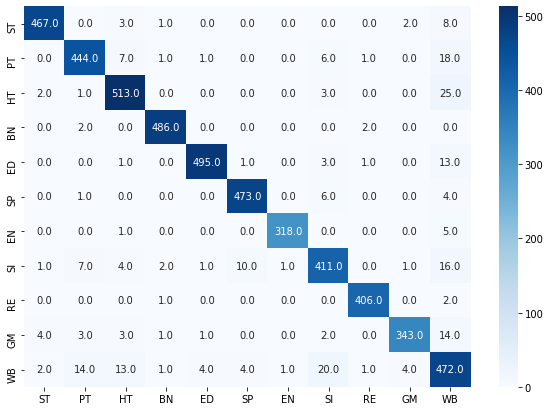

In [26]:
import seaborn as sn
con = confusion_matrix(test_y, pred)
df_cm = pd.DataFrame(con, index =my_tags ,
                  columns = my_tags)
print(con)
plt.figure(figsize = (10,7))
za = sn.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt=".1f",cmap=plt.cm.Blues)

figure = za.get_figure()    
figure.savefig('svm_conf.png', dpi=500,bbox_inches = 'tight')


SVC


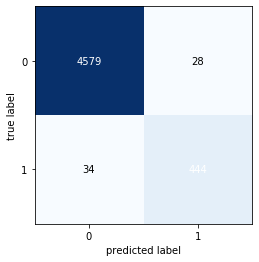

In [0]:
print('SVC')

cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)


fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()



In [0]:
#Lr
print()
print ("~ Using Logistic Regression ~ ")
LRModel = linear_model.LogisticRegression(C=1.0, solver='lbfgs', multi_class='multinomial')
accuracySVC = train_model(LRModel, xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracySVC)))
LRModel = LRModel.fit(xtrain_count, train_y) 
pred = LRModel.predict(xtest_count)
print('Training acc : ', accuracy_score(train_y,LRModel.predict(xtrain_count)))

from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


train_acc= accuracy_score(train_y, LRModel.predict(xtrain_count))
print("Train acc :",train_acc)
print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
print(classification_report(test_y, pred,target_names=my_tags))


~ Using Logistic Regression ~ 
Predicting tweet: Virat score a double centruy in test match
Result: ['SP']
Accuracy: 94.946%
Training acc :  0.994165082278896
Train acc : 0.994165082278896
roc_auc_score : 0.9727315194666682
              precision    recall  f1-score   support

          ST       0.99      0.96      0.97       481
          PT       0.95      0.92      0.94       478
          HT       0.94      0.94      0.94       544
          BN       0.99      0.99      0.99       490
          ED       0.99      0.96      0.97       514
          SP       0.97      0.98      0.97       484
          EN       0.99      0.98      0.99       324
          SI       0.91      0.91      0.91       454
          RE       0.99      0.99      0.99       409
          GM       0.99      0.92      0.95       371
          WB       0.81      0.90      0.85       536

    accuracy                           0.95      5085
   macro avg       0.96      0.95      0.95      5085
weighted avg     

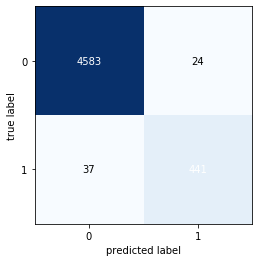

In [0]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()



In [0]:
#RF
print()
print ("~ Using Random Forest Classifier ~")
RFModel = RandomForestClassifier(n_estimators=500, max_depth=200, random_state=0)
accuracyRF = train_model(RFModel,xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracyRF)))
RFModel = RFModel.fit(xtrain_count, train_y) 
pred = RFModel.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

train_acc= accuracy_score(train_y, RFModel.predict(xtrain_count))
print("Train acc :",train_acc)
print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
print(classification_report(test_y, pred,target_names=my_tags))


~ Using Random Forest Classifier ~
Predicting tweet: Virat score a double centruy in test match
Result: ['SP']
Accuracy: 95.713%
Train acc : 0.9910837212351669
roc_auc_score : 0.9771537105384234
              precision    recall  f1-score   support

          ST       0.97      0.97      0.97       481
          PT       0.96      0.94      0.95       478
          HT       0.97      0.92      0.94       544
          BN       1.00      1.00      1.00       490
          ED       0.98      0.98      0.98       514
          SP       0.95      0.99      0.97       484
          EN       0.99      0.98      0.99       324
          SI       0.95      0.93      0.94       454
          RE       0.98      1.00      0.99       409
          GM       0.98      0.93      0.96       371
          WB       0.83      0.90      0.86       536

    accuracy                           0.96      5085
   macro avg       0.96      0.96      0.96      5085
weighted avg       0.96      0.96      0.96   

Rf


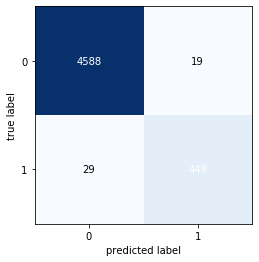

In [0]:
print("Rf")
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()



In [0]:
from sklearn.ensemble import GradientBoostingClassifier

print("Gradient boosting")
GB=GradientBoostingClassifier(learning_rate=0.01,max_depth=2,random_state=0)
accuracyGB = train_model(GB,xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracyGB)))
GB = GB.fit(xtrain_count, train_y) 
pred = GB.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
train_acc= accuracy_score(train_y, GB.predict(xtrain_count))
print('train_acc',train_acc)
print(classification_report(test_y, pred,target_names=my_tags))


print()
print()

GB=GradientBoostingClassifier(random_state=0)
accuracyGB = train_model(GB,xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracyGB)))
GB = GB.fit(xtrain_count, train_y) 
pred = GB.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
train_acc= accuracy_score(train_y, GB.predict(xtrain_count))
print('train_acc',train_acc)
print(classification_report(test_y, pred,target_names=my_tags))

Gradient boosting
Predicting tweet: Virat score a double centruy in test match
Result: ['WB']
Accuracy: 88.614%
roc_auc_score : 0.9388991010460171
train_acc 0.8764833147577525
              precision    recall  f1-score   support

          ST       0.96      0.92      0.94       481
          PT       0.95      0.77      0.85       478
          HT       0.98      0.74      0.84       544
          BN       0.99      0.96      0.97       490
          ED       0.98      0.95      0.97       514
          SP       0.89      0.96      0.93       484
          EN       0.99      0.96      0.97       324
          SI       0.92      0.74      0.82       454
          RE       0.99      0.96      0.98       409
          GM       0.98      0.89      0.94       371
          WB       0.54      0.93      0.69       536

    accuracy                           0.89      5085
   macro avg       0.92      0.89      0.90      5085
weighted avg       0.92      0.89      0.89      5085



Predictin


~ Using NN ~ 
Predicting tweet: Virat score a double centruy in test match
Result: ['SP']
Accuracy: 93.904%
Train acc : 0.9986232216613126
roc_auc_score : 0.9676285008286267
              precision    recall  f1-score   support

          ST       0.94      0.97      0.96       481
          PT       0.91      0.91      0.91       478
          HT       0.92      0.94      0.93       544
          BN       0.98      0.99      0.98       490
          ED       0.96      0.96      0.96       514
          SP       0.97      0.97      0.97       484
          EN       0.98      0.98      0.98       324
          SI       0.88      0.89      0.88       454
          RE       0.99      0.99      0.99       409
          GM       0.97      0.94      0.95       371
          WB       0.85      0.82      0.84       536

    accuracy                           0.94      5085
   macro avg       0.94      0.94      0.94      5085
weighted avg       0.94      0.94      0.94      5085



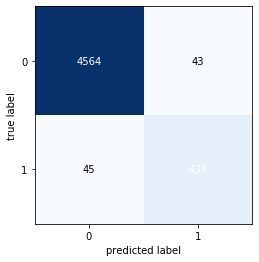

In [0]:
#NN
print()
print ("~ Using NN ~ ")
NNModel = MLPClassifier(activation='relu', max_iter=800, solver='lbfgs', learning_rate_init=0.005, hidden_layer_sizes=(46, 44), random_state=1)
accuracyNN = train_model(NNModel, xtrain_count.toarray(), train_y, xtest_count.toarray(), test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracyNN)))
NNModel = NNModel.fit(xtrain_count, train_y) 
pred = NNModel.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


train_acc= accuracy_score(train_y, NNModel.predict(xtrain_count))
print("Train acc :",train_acc)

print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
print(classification_report(test_y, pred,target_names=my_tags))
cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()


In [0]:
def majority_voting(x_train, y_train, x_test, y_test):    
    NBPredict = NBModel.predict(x_test)
    SVCPredict = SVCModel.predict(x_test)
    LRPredict = LRModel.predict(x_test)
    RFPredict = RFModel.predict(x_test)
    NNPredict = NNModel.predict(x_test)
    GBPredict = GB.predict(x_test)
#    
    votingPred = []
    
    for i in range(len(y_test)):
        for_pred = [NBPredict[i], LRPredict[i], SVCPredict[i], RFPredict[i], NNPredict[i],GBPredict[i]]
        highest = for_pred[0]
        count = 0
        for current_pred in for_pred: 
            new_count = 0
            for test_pred in for_pred:
                if current_pred == test_pred:
                    new_count = new_count + 1
            if new_count > count:
                highest = current_pred
                count = new_count
        votingPred.append(highest)
           
    return metrics.accuracy_score(votingPred, y_test)

In [0]:
def majorityVotingPredictor(inputX):
    NBPredict = NBModel.predict(count_vect.transform([inputX]))
    SVCPredict = SVCModel.predict(count_vect.transform([inputX]))
    LRPredict = LRModel.predict(count_vect.transform([inputX]))
    RFPredict = RFModel.predict(count_vect.transform([inputX]))
    NNPredict = NNModel.predict(count_vect.transform([inputX]))
    GBPredict = GB.predict(count_vect.transform([inputX]))
    
    print("NB: {}".format(encoder.inverse_transform(NBPredict)))
    print("SVC: {}".format(encoder.inverse_transform(SVCPredict)))
    print("LR: {}".format(encoder.inverse_transform(LRPredict)))
    print("RF: {}".format(encoder.inverse_transform(RFPredict)))
    print("NN: {}".format(encoder.inverse_transform(NNPredict)))
    print("GB: {}".format(encoder.inverse_transform(GBPredict)))
    
    for_pred = [NBPredict, LRPredict, SVCPredict, RFPredict, NNPredict,GBPredict]
    highest = for_pred[0]
    count = 0
    for current_pred in for_pred: 
        new_count = 0
        for test_pred in for_pred:
            if current_pred == test_pred:
                new_count = new_count + 1
        if new_count > count:
            highest = current_pred
            count = new_count
    
    return encoder.inverse_transform(highest)

In [0]:
print()
print ("~ Using Majority Voting ~ ")
votingAccuracy = majority_voting(xtrain_count, train_y, xtest_count, test_y)
print ("Accuracy: {}%".format(formatAccuracy(votingAccuracy)))


~ Using Majority Voting ~ 
Accuracy: 95.89%


In [0]:
custom_input = "Imran khan protested gainst PPP"
print("Predicting tweet: {}".format(custom_input))
result = majorityVotingPredictor(preprocess(custom_input))
print("Majority Voting: {}".format(result))

Predicting tweet: Imran khan protested gainst PPP
NB: ['PT']
SVC: ['EN']
LR: ['EN']
RF: ['PT']
NN: ['SI']
GB: ['WB']
Majority Voting: ['PT']
